<a href="https://colab.research.google.com/github/Arta-DS/Features-and-model-building/blob/main/%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%2C_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_athletes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Угадываем признак

In [100]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import auc

In [54]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [56]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [57]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [58]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [59]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


### Строим модель

In [61]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [62]:
X = X.drop('name', axis=True)

In [63]:
X = pd.get_dummies(X)
X.head(3)

,id,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,736041664,1.72,64.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,532037425,1.68,56.0,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,435962603,1.98,79.0,0,0,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
y = data['sex']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка количества строк в каждой выборке
print("Количество строк в тренировочной выборке: {}".format(len(X_train)))
print("Количество строк в тестовой выборке: {}".format(len(X_test)))

Количество строк в тренировочной выборке: 8686
Количество строк в тестовой выборке: 2172


In [66]:
# Логистическая регрессия
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
preds_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, preds_logreg)
print(f"Точность логистической регрессии: {accuracy_logreg}")

Точность логистической регрессии: 0.5469613259668509


In [67]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [68]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [69]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [70]:
le.fit( data['sex'] )

LabelEncoder()

In [71]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

,0
0,1
1,0
2,1
3,1
4,1


In [72]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

LogisticRegression()

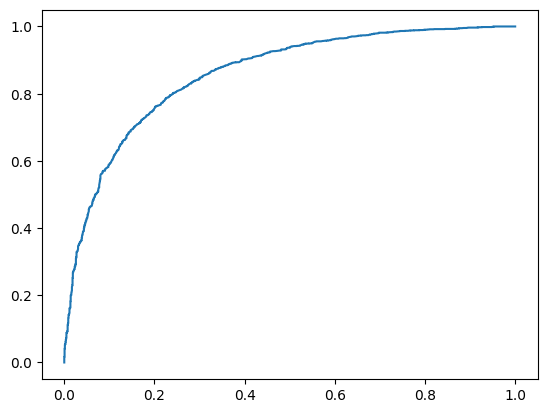

In [73]:
predictions = model.predict_proba(X_test)

fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])
plt.plot( fpr, tpr )

In [74]:
roc_auc_score(y_test, predictions[:, 1])

0.8580501576269536

In [75]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    if predicted == 1:
      if actual == 1:
        tp += 1
      else:
        fp += 1
    else:
      if actual == 1:
        fn += 1
      else:
        tn += 1

In [76]:
tp, fp, fn, tn

(1449, 378, 337, 1094)

In [77]:
accurasy = (tp + tn)/(tp + fp + tn +fn)
accurasy

0.7805402087170042

In [78]:
precision = tp/(tp + fp)
precision

0.7931034482758621

In [79]:
tpr = tp/(tp + fn) #true positive rate или recall
tpr

0.8113101903695409

In [80]:
fpr = fp/(fp + tn) #false positive rate
fpr

0.25679347826086957

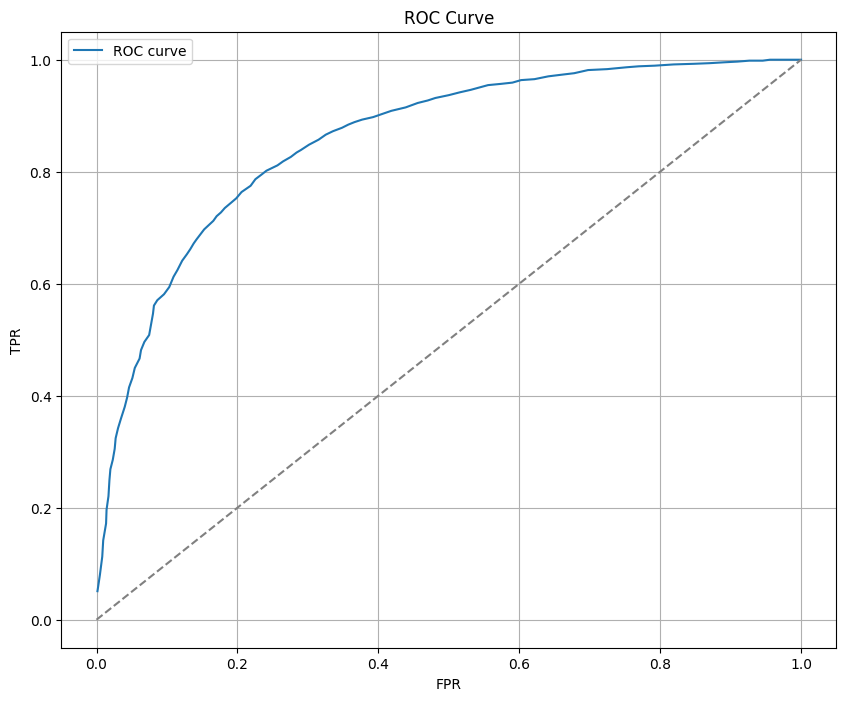

In [81]:
thresholds = np.arange(0, 1, 0.01)

tprs = []
fprs = []

for threshold in thresholds:
    # Определить предсказания на основе порога
    pred = (predictions[:, 1] >= threshold).astype(int)

    # Пересчитать TP, FP, FN, TN
    tp = ((pred == 1) & (y_test == 1)).sum()
    fp = ((pred == 1) & (y_test == 0)).sum()
    fn = ((pred == 0) & (y_test == 1)).sum()
    tn = ((pred == 0) & (y_test == 0)).sum()

    # Рассчитать TPR и FPR
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    tprs.append(tpr)
    fprs.append(fpr)

# Построение ROC-кривой
plt.figure(figsize=(10, 8))
plt.plot(fprs, tprs, label="ROC curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Диагональная линия
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= 0.7:
        predicted = 1
    else:
        predicted = 0
    if predicted == 1:
      if actual == 1:
        tp += 1
      else:
        fp += 1
    else:
      if actual == 1:
        fn += 1
      else:
        tn += 1
tp, fp, fn, tn

(1094, 161, 692, 1311)

In [89]:
accurasy = (tp + tn)/(tp + fp + tn +fn)
accurasy

0.738182934315531

In [90]:
precision = tp/(tp + fp)
precision

0.8717131474103585

In [91]:
tpr = tp/(tp + fn) #true positive rate или recall
tpr

0.6125419932810751

In [92]:
fpr = fp/(fp + tn) #false positive rate
fpr

0.109375

In [94]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= 0.3:
        predicted = 1
    else:
        predicted = 0
    if predicted == 1:
      if actual == 1:
        tp += 1
      else:
        fp += 1
    else:
      if actual == 1:
        fn += 1
      else:
        tn += 1
tp, fp, fn, tn

(1673, 736, 113, 736)

In [95]:
accurasy = (tp + tn)/(tp + fp + tn +fn)
accurasy

0.7394106813996317

In [96]:
precision = tp/(tp + fp)
precision

0.6944790369447904

In [97]:
tpr = tp/(tp + fn) #true positive rate или recall
tpr

0.9367301231802911

In [98]:
fpr = fp/(fp + tn) #false positive rate
fpr

0.5

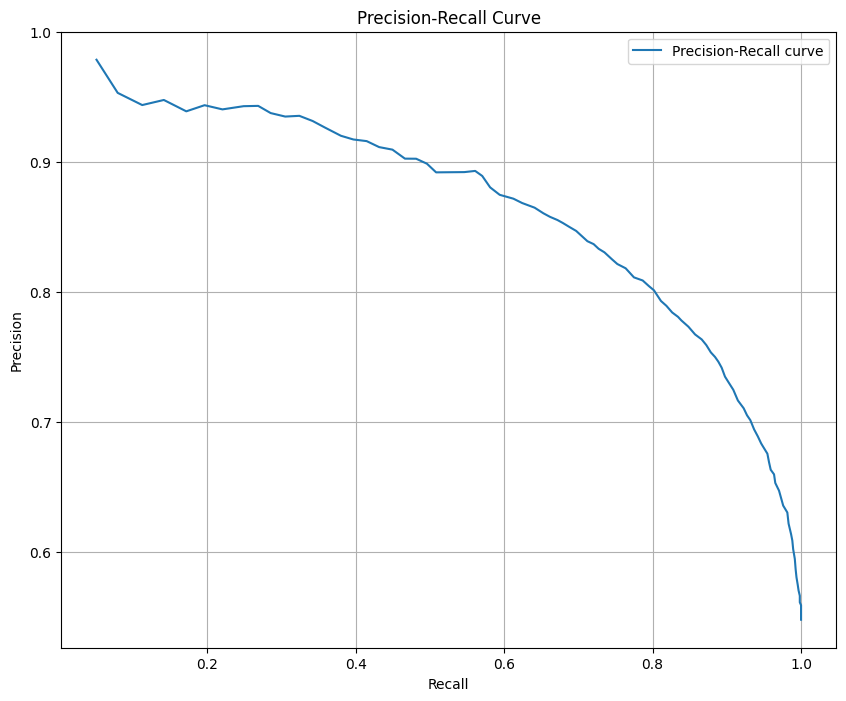

In [99]:
precisions = []
recalls = []

for threshold in thresholds:
    # Определить предсказания на основе порога
    pred = (predictions[:, 1] >= threshold).astype(int)

    # Пересчитать TP, FP, FN, TN
    tp = ((pred == 1) & (y_test == 1)).sum()
    fp = ((pred == 1) & (y_test == 0)).sum()
    fn = ((pred == 0) & (y_test == 1)).sum()

    # Рассчитать Precision и Recall
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    precisions.append(precision)
    recalls.append(recall)

# Построение Precision-Recall кривой
plt.figure(figsize=(10, 8))
plt.plot(recalls, precisions, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [102]:
roc_auc = auc(fprs, tprs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8582028777569501


Оценка качества модели

Качество модели можно оценить, анализируя полученные графики и метрики:

1. ROC-кривая: Эта кривая отображает зависимость между TPR (чувствительность) и FPR (специфичность) при изменении порогов принятия решения. Если кривая находится ближе к верхнему левому углу, то модель считается хорошей, так как она имеет высокую чувствительность при низкой частоте ложных срабатываний. В случае, когда кривая приближается к диагональной линии, качество модели ухудшается, поскольку она начинает давать случайные результаты.
   
2. Precision-Recall кривая: Этот график позволяет увидеть баланс между точностью (precision) и полнотой (recall). Хорошей моделью считается та, у которой кривая стремится вверх и вправо, показывая высокие значения обеих метрик. Кривые, близкие к началу координат, указывают на низкую точность и полноту.

3. ROC-AUC: Площадь под ROC-кривой (AUC) служит интегральной оценкой качества модели. Значения AUC близки к 1 означают хорошую модель, тогда как значения около 0.5 соответствуют случайным результатам.

Исходя из этих показателей, можно сказать следующее:
- Если ROC-кривая находится значительно выше диагонали, и значение AUC близко к 1, модель обладает высокой способностью различать классы.
- Если Precision-Recall кривая проходит высоко и правее, модель точно классифицирует большинство положительных случаев.
  
Может ли ROC-кривая проходить ниже диагонали?

Да, ROC-кривая может проходить ниже диагонали. Это означает, что модель работает хуже, чем случайный выбор. В таком случае стоит пересмотреть архитектуру модели, параметры обучения или набор данных.